In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from dataloader import get_mnist_dataloaders  # Import your data loader function
from model import SimpleNN  # Import your model


In [18]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
train_loader, test_loader = get_mnist_dataloaders()

Training dataset size: 60000
Test dataset size: 10000


In [20]:
train_loader

In [21]:
test_loader

In [22]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

In [23]:
# Instantiate the model
model = SimpleNN()

In [24]:
# Define loss function
criterion = torch.nn.CrossEntropyLoss()

In [25]:
# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Calculate average training loss for the epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Evaluate on the test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    # Calculate average test loss for the epoch
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs} => Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


Epoch 1/10 => Training Loss: 0.4035, Test Loss: 0.2274
Epoch 2/10 => Training Loss: 0.1890, Test Loss: 0.1483
Epoch 3/10 => Training Loss: 0.1364, Test Loss: 0.1446
Epoch 4/10 => Training Loss: 0.1098, Test Loss: 0.1146
Epoch 5/10 => Training Loss: 0.0932, Test Loss: 0.1023
Epoch 6/10 => Training Loss: 0.0813, Test Loss: 0.1087
Epoch 7/10 => Training Loss: 0.0740, Test Loss: 0.1011
Epoch 8/10 => Training Loss: 0.0657, Test Loss: 0.0949
Epoch 9/10 => Training Loss: 0.0610, Test Loss: 0.0980
Epoch 10/10 => Training Loss: 0.0533, Test Loss: 0.0960


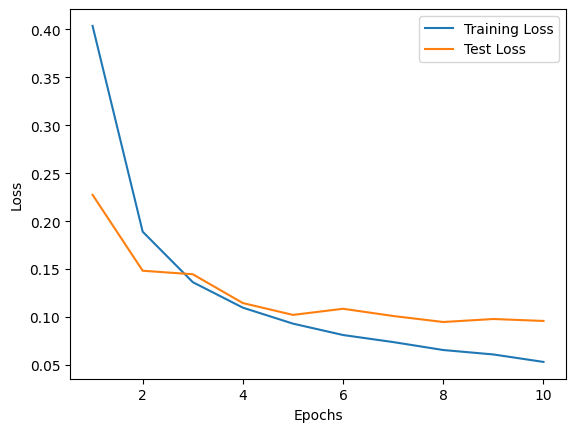

In [27]:
# Plotting the training and test losses
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()